# GeoPandas

The GeoPandas documentation can be found here: http://geopandas.org/ 

There are excellent explainations and examples in the documentation to learn from. After installing GeoPandas and it's depandancies we need to import the library. GeoPandas is a pythonic library, we also need Fiona and Shapely for reading the vector data and geometry processing.  

In [107]:
import geopandas as gpd

## Countries

In [108]:
# let's read in some simple data to work with 
# the main data we'll be working with is a geopackage file. 
data = 'data/geopandas_files/countries.gpkg'
countries = gpd.read_file(data)

In [109]:
countries.head(7)


,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Argentina,44293293,15,879400.0,2017,2010,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
6,Dhekelia,7850,5,314.0,2013,-99,2013,2. Developed region: nonG7,2. High income: nonOECD,Asia,"MULTIPOLYGON (((33.78094 34.97635, 33.76043 34..."


This is what a geopandas dataframe looks like. The last column is a special columns ... bla bla bla.... explain more

In [110]:
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


In [111]:
countries.shape

(253, 11)

In [112]:
# let's isolate Canada and we can look at the more finer detail later.
canada = countries[countries['NAME']=='Canada']

## Capitals

In [160]:
# import a geojson file that contains information about capitals around the world
capitals = gpd.read_file('data/geopandas_files/cities.geojson')

In [114]:
# Explore capitals data
capitals.head()  # checking out capitals

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000 -34.48000)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90100 -33.54400)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.30400 -33.13900)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400 -34.53800)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21500 -34.09900)


In [115]:
capitals.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


In [116]:
capitals.shape

(7343, 9)

The first 8 columns of the capitals geodataframe are just normal tabular data. The last column 'geometry' is made up of points, unlike in countries where the geometry is polygons. 

one thing that I could definatly do here is to isolate the capitals that are in canada. at a first glance this isn't as simple task as it should be. There is no country information cantained in the capitals data. need to write a check. The geometry of capitals is a point. a could be done to see if this point is contained in the polygon geometry of the country. 

In [117]:
import matplotlib.pyplot as plt 

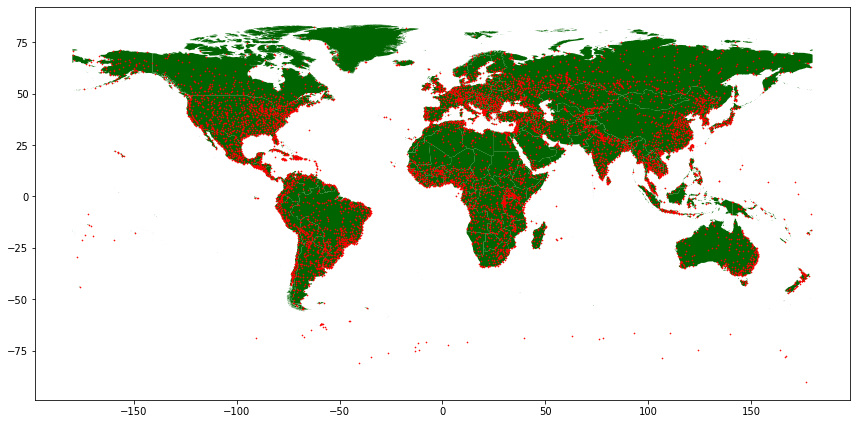

In [118]:
# capitals can be plotted/overlayed ontop of countries
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax, color='darkgreen')
capitals.plot(markersize=0.4, color='red',ax=ax)
plt.tight_layout()
plt.savefig('output/cities_of_the_world.png')
plt.show()

## Rivers

In [119]:
# import second geopackage file that contains information about rivers around 
# the world
rivers = gpd.read_file("data/geopandas_files/rivers.gpkg")

In [120]:
rivers.head()

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."


In [121]:
rivers.describe()

,scalerank,rivernum,min_zoom,min_label,wdid_score,ne_id
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1.455000e+03
mean,6.824055,900.829553,5.855601,6.855601,3.563574,1.159121e+09
std,1.925175,5870.455230,1.380113,1.380113,1.575227,6.427548e+03
min,0.000000,0.000000,2.000000,3.000000,0.000000,1.159109e+09
25%,6.000000,270.500000,5.000000,6.000000,4.000000,1.159115e+09
50%,7.000000,570.000000,6.000000,7.000000,4.000000,1.159122e+09
75%,8.000000,865.500000,7.000000,8.000000,4.000000,1.159127e+09
max,10.000000,178000.000000,7.200000,8.200000,5.000000,1.159130e+09


In [122]:
rivers.shape

(1455, 35)

The geometry column in the rivers data contains 'lines'. This is essentially just a string of points. The rives can also be overlayed ontop of the countries data. 

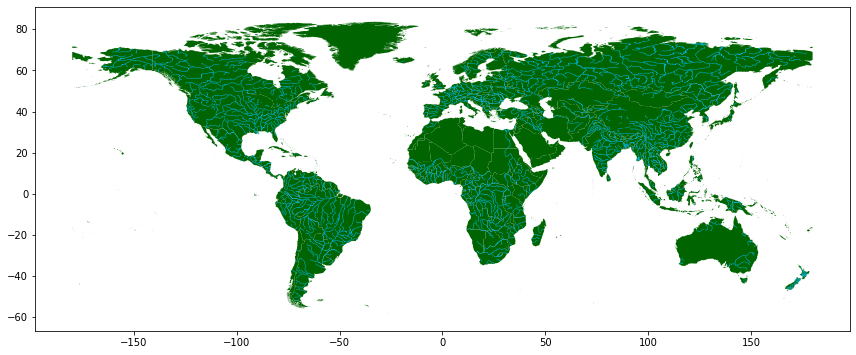

In [123]:
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax, color='darkgreen')
rivers.plot(linewidth=0.4, color='deepskyblue',ax=ax)
plt.tight_layout()
plt.savefig('output/rivers_of_the_world.png')
plt.show()

## Coordinate reference systems (crs)
The crs is used to locate geographical entities and attributes. Different sets of data may have different crs. In order to get data to work correctly with other data we must make sure that they have the same crs. If this isn't the case then we can transform one into the other using the transform parameters. 

In [124]:
# making sure that our 3 sets of data have the same crs
countries.crs == capitals.crs == rivers.crs

True

In [125]:
countries.crs  # for more info check out this link:
# https://spatialreference.org/ref/epsg/wgs-84/

{'init': 'epsg:4326'}

epsg:4326 is the World Geodetic System, this crs is used in GPS.

Let's have a closer look at the geometry of Indonesia, the first country in the countries geodataframe.

In [126]:
countries.geometry[:1]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
Name: geometry, dtype: geometry

Now, let's change from the World Geodetic System to a different projection. A very popular one is the Mercator Projection. 

In [127]:
countries_mercator = countries.to_crs({'init': 'epsg:3395'})
# let's see how the values in the geometry have changed
countries_mercator['geometry'][:1]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
Name: geometry, dtype: geometry

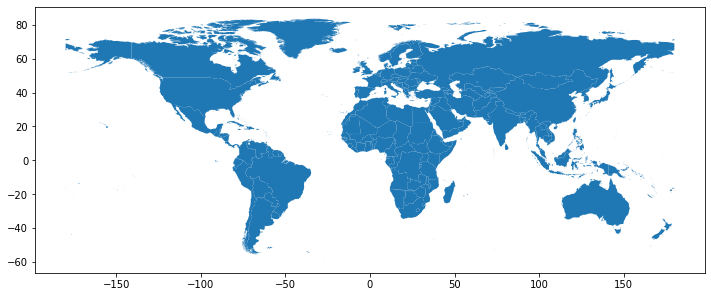

In [128]:
# comparing the two different projections. 
countries.plot(figsize=(12,12));
plt.savefig("output/wgs84.png")

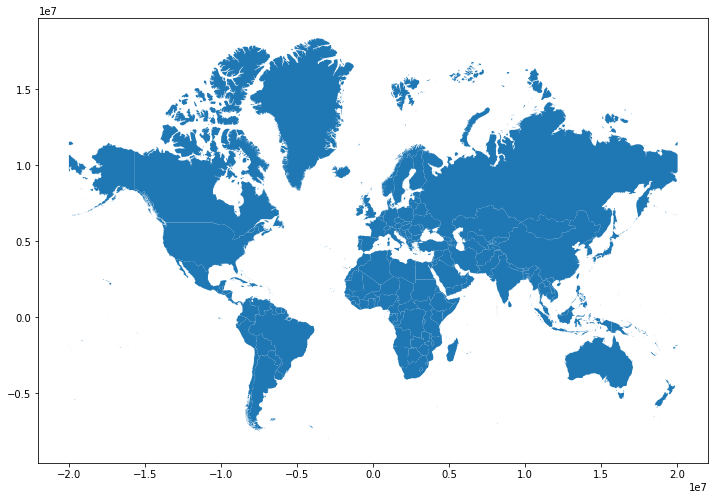

In [129]:
countries_mercator.plot(figsize=(12,12));
plt.savefig("output/mercator.png")

## Overlay of Europe

In [130]:
europe = countries[countries['CONTINENT'] == "Europe"]

In [131]:
europe = europe[['NAME','geometry']]

In [161]:
# we will be creating a buffer in meters around each of the capitals
europe = europe.to_crs('+init=epsg:3395')  # this crs uses meters for distance
capitals = capitals.to_crs('+init=epsg:3395')

'+init=epsg:3395'

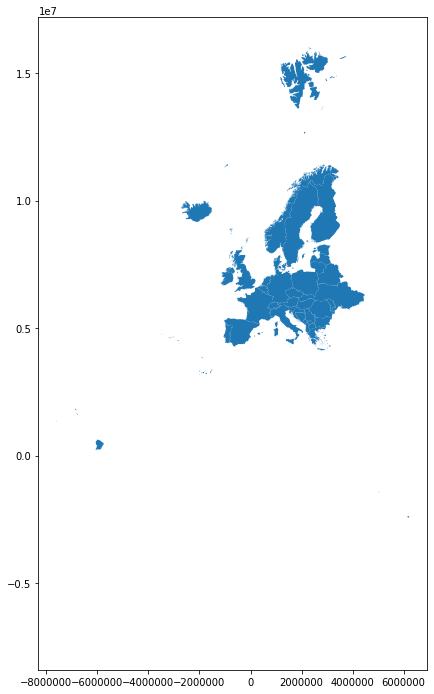

In [162]:
europe.plot(figsize=(12,12))
capitals.crs

Dropping Russia and the Canary Islands from the data... Couldn't figure out what country was down there at the side of Africa. 

In [134]:
europe = europe[europe['NAME'] != "Russia"]

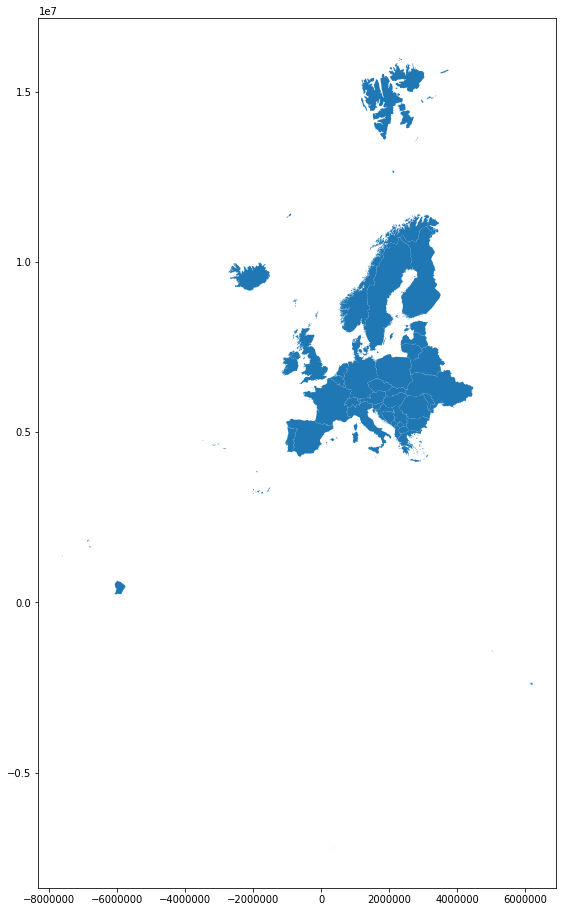

In [135]:
europe.plot(figsize=(12,16))

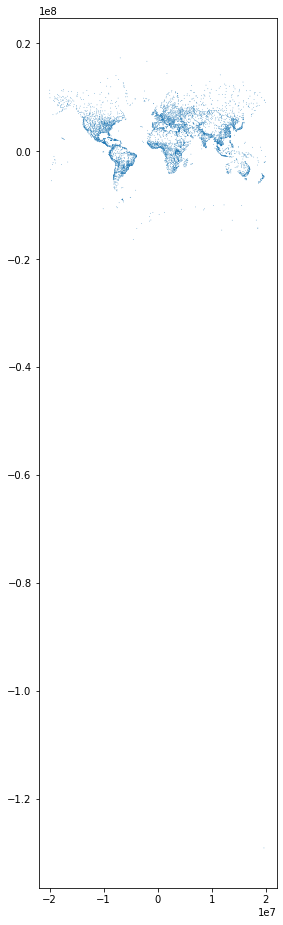

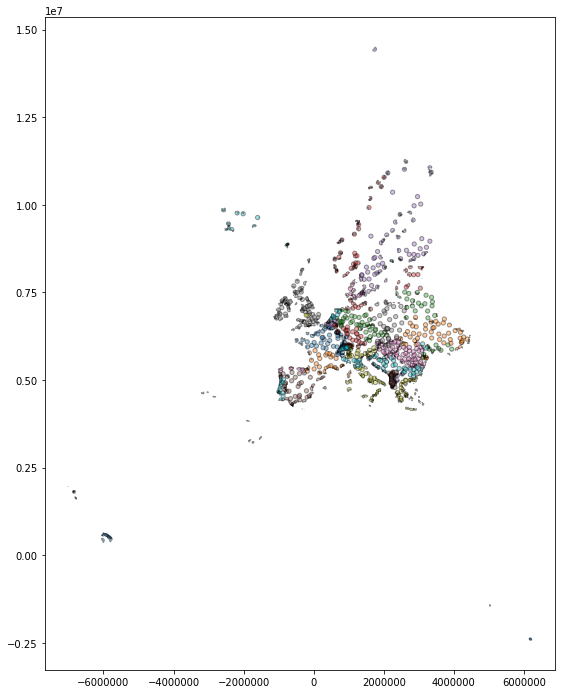

In [164]:
capitals['geometry'] = capitals.buffer(60000)  # 60,000m buffer
country_cores = gpd.overlay(europe, capitals, how='intersection')
country_cores.plot(alpha=0.4, edgecolor='k', cmap='tab10', figsize=(12,12));

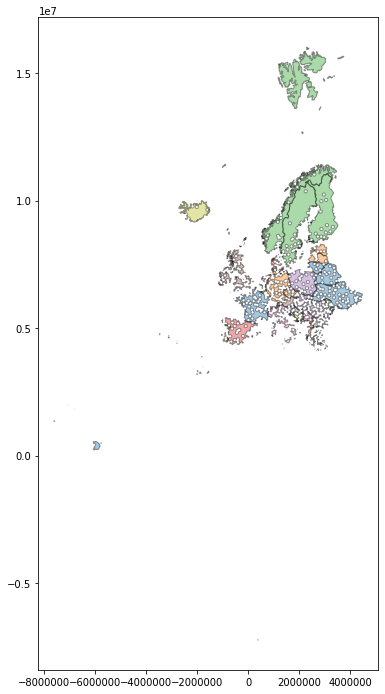

In [165]:
country_peripheries = gpd.overlay(europe, capitals, how='difference')
country_peripheries.plot(alpha=0.4, edgecolor='k', cmap='tab10', figsize=(12,12));

This overlay function is a very useful tool. An excellent Jupyter Notebook that has more examples can be found here https://nbviewer.jupyter.org/github/geopandas/geopandas/blob/master/examples/overlays.ipynb